# Predicting Customer Churn Rate

**1. Data Preprocessing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Sadneya\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv('C://Users//Sadneya//Downloads//archive//Bank Customer Churn Prediction.csv')
# Check for missing values
print(data.isnull().sum())

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Features and target variable
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


**2. Univariate and Bivariate Analysis**

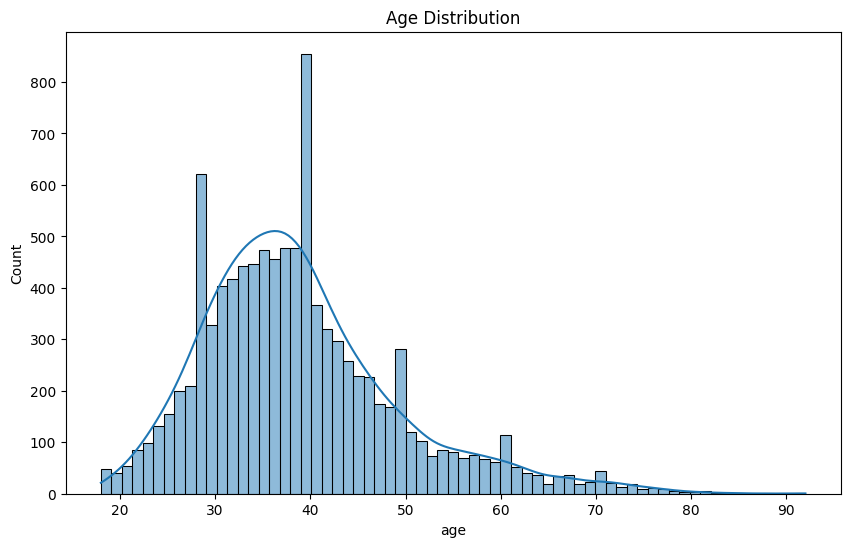

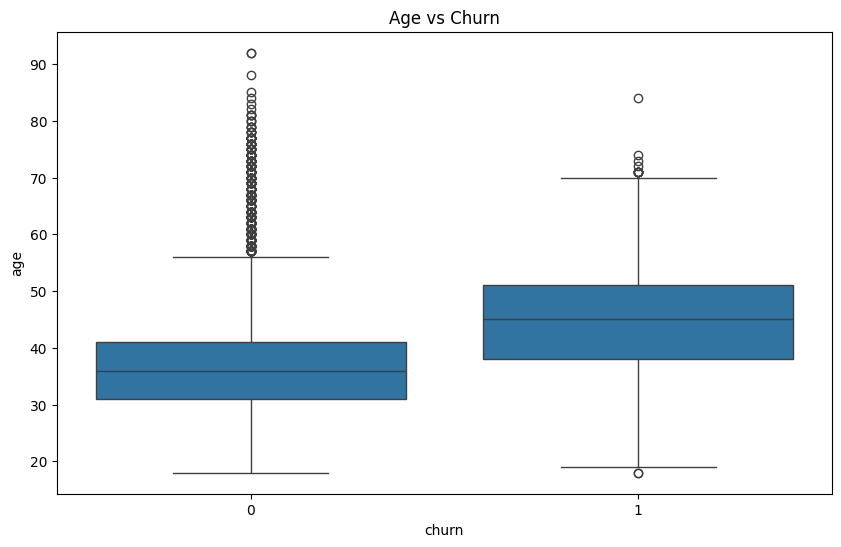

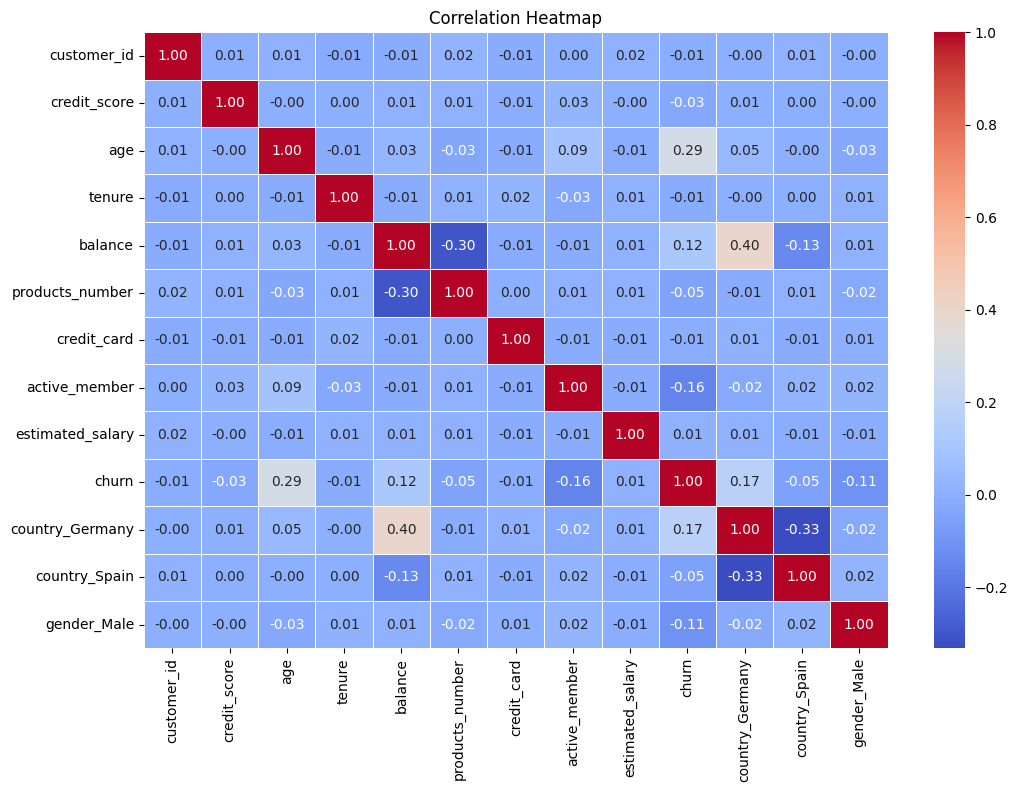

In [3]:
# Univariate analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='age', data=data)
plt.title('Age vs Churn')
plt.show()

# Correlation heatmap for bivariate analysis
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Model Training with Hyperparameter Tuning**

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:  {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy Score:  0.8645
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



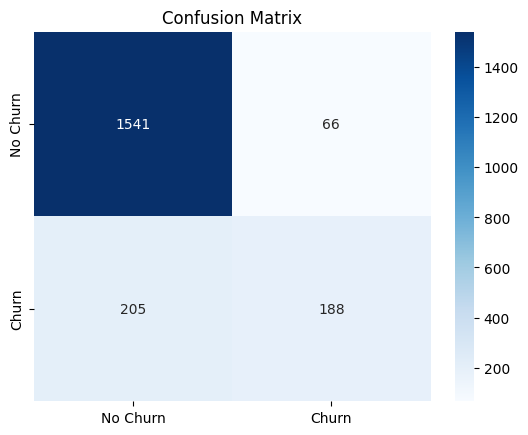

In [4]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Hyperparameters for GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search for Hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearch
print("Best parameters found: ", grid_search.best_params_)

# Model performance with GridSearch best parameters
y_pred = grid_search.best_estimator_.predict(X_test_scaled)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.show()


**4. SHAP (SHapley Additive exPlanations) for Feature Importance**

In [6]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

In [7]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [8]:
shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])

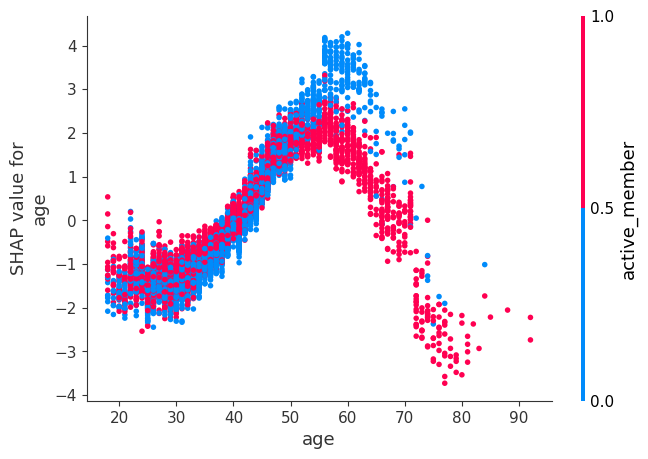

In [10]:
shap.dependence_plot('age', shap_values, X)

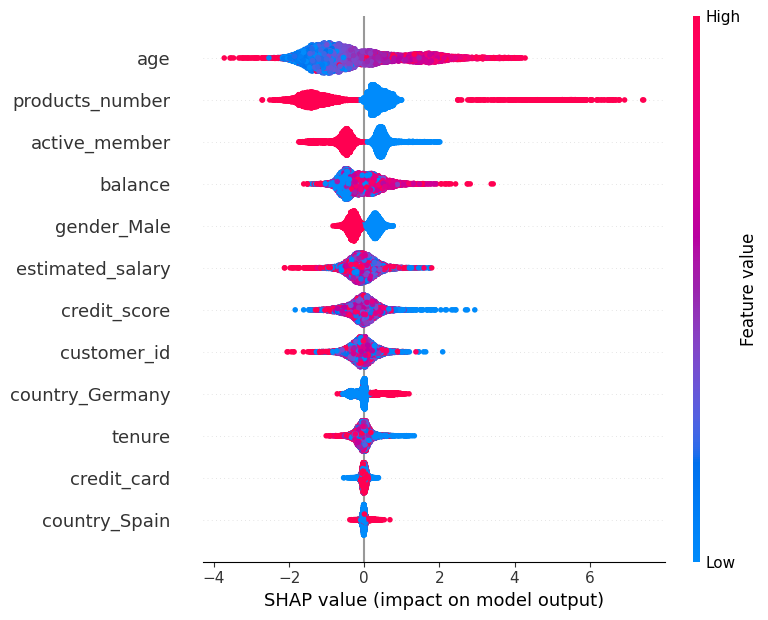

In [11]:
shap.summary_plot(shap_values, X)